<a href="https://colab.research.google.com/github/UsmanMani4/Neural_Network_From_Scratch/blob/main/NN_Scratch__Understanding__dummydata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Neural Network: Training without Libraries For Understanding


Pass data through the network without errors and understand shapes.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

print("Libraries imported and random seed set.")


Libraries imported and random seed set.


#Dummy Dataset

In [2]:
# Number of samples and input features
num_samples = 5        # small number for testing
input_features = 784   # MNIST images are 28x28 flattened
num_classes = 10       # digits 0-9

# Random dummy input data (values between 0 and 1)
X = np.random.rand(num_samples, input_features)

# Sample labels (integer class IDs)
y_true = np.array([1, 3, 0, 9, 4])

print(f"X shape: {X.shape}")
print(f"y_true shape: {y_true.shape}")
print("Dummy dataset created.")


X shape: (5, 784)
y_true shape: (5,)
Dummy dataset created.


Random seed ensures same initialization every run.

#Normalizing The Input Feature


In [3]:
# Dummy data is already 0-1, but for MNIST: divide pixel values by 255
X_normalized = X  # for now, same as X


# Verifying

In [4]:
# Quick check: print first sample
print("First sample of X (input features):")
print(X[0][:10], "...")  # show first 10 features
print("Corresponding label:", y_true[0])


First sample of X (input features):
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258] ...
Corresponding label: 1


# Forward Propagation
## Dense Layer


In [5]:
class Dense:
    """
    Fully connected layer: output = X*W + b
    """
    def __init__(self, input_size, output_size):
        # Initialize weights small random numbers
        self.W = np.random.randn(input_size, output_size) * 0.01
        # Initialize biases as zeros
        self.b = np.zeros((1, output_size))

    def forward(self, X):
        """
        Forward pass
        X: input data, shape (batch_size, input_size)
        Returns Z: linear output, shape (batch_size, output_size)
        """
        self.X = X  # cache for backprop
        Z = np.dot(X, self.W) + self.b
        return Z


##ReLu Activation

In [6]:
class ReLU:
    """
    ReLU Activation: f(x) = max(0, x)
    """
    def forward(self, Z):
        self.Z = Z  # cache for backprop
        A = np.maximum(0, Z)
        return A


##Softmax

In [7]:
def softmax(Z):
    """
    Softmax activation: converts logits to probabilities
    Z: shape (batch_size, num_classes)
    """
    # Subtract max for numerical stability
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    probabilities = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
    return probabilities


## Initializing Layers

In [8]:
# Network architecture: 784 -> 128 -> 64 -> 10
dense1 = Dense(784, 128)
relu1 = ReLU()
dense2 = Dense(128, 64)
relu2 = ReLU()
dense3 = Dense(64, 10)  # output layer


##Forward Pass with Dummy Data

In [9]:
# Forward pass
Z1 = dense1.forward(X)
A1 = relu1.forward(Z1)

Z2 = dense2.forward(A1)
A2 = relu2.forward(Z2)

Z3 = dense3.forward(A2)
y_pred = softmax(Z3)

# Print shapes
print("Shapes after each layer:")
print(f"Z1: {Z1.shape}, A1: {A1.shape}")
print(f"Z2: {Z2.shape}, A2: {A2.shape}")
print(f"Z3: {Z3.shape}, y_pred: {y_pred.shape}")

# Print first sample predictions
print("Predicted probabilities for first sample:")
print(y_pred[0])


Shapes after each layer:
Z1: (5, 128), A1: (5, 128)
Z2: (5, 64), A2: (5, 64)
Z3: (5, 10), y_pred: (5, 10)
Predicted probabilities for first sample:
[0.09994093 0.09996126 0.1000499  0.09996597 0.09998993 0.09999907
 0.10017951 0.09996017 0.09992977 0.1000235 ]


##Dense Layer

In [10]:
class Dense:
    def __init__(self, input_dim, output_dim):
        self.W = np.random.randn(input_dim, output_dim) * 0.01
        self.b = np.zeros((1, output_dim))

    def forward(self, X_input):
        self.X_input = X_input
        self.Z_linear = np.dot(X_input, self.W) + self.b
        return self.Z_linear

    def backward(self, dZ_output, learning_rate):
        dW = np.dot(self.X_input.T, dZ_output)
        db = np.sum(dZ_output, axis=0, keepdims=True)
        dX_prev = np.dot(dZ_output, self.W.T)
        self.W -= learning_rate * dW
        self.b -= learning_rate * db
        return dX_prev


##ReLU Layer

In [11]:
class ReLU:
    def forward(self, Z_input):
        self.Z_input = Z_input
        A_output = np.maximum(0, Z_input)
        return A_output

    def backward(self, dA_output):
        dZ_input = dA_output * (self.Z_input > 0)
        return dZ_input


##One-Hot Encoding & Loss

In [12]:
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

def cross_entropy_loss(pred_probs, true_onehot):
    m = true_onehot.shape[0]
    loss = -np.sum(true_onehot * np.log(pred_probs + 1e-9)) / m
    return loss

y_onehot = one_hot_encode(y_true, 10)


##Initialize Layers

In [13]:
# Initialize layers with updated names
dense_input_hidden = Dense(784, 128)
relu_hidden1 = ReLU()
dense_hidden_hidden = Dense(128, 64)
relu_hidden2 = ReLU()
dense_hidden_output = Dense(64, 10)


##Forward Pass

In [14]:
Z_hidden1 = dense_input_hidden.forward(X)
A_hidden1 = relu_hidden1.forward(Z_hidden1)

Z_hidden2 = dense_hidden_hidden.forward(A_hidden1)
A_hidden2 = relu_hidden2.forward(Z_hidden2)

Z_output = dense_hidden_output.forward(A_hidden2)
y_pred = softmax(Z_output)

print("Forward pass shapes:")
print(f"Z_hidden1: {Z_hidden1.shape}, A_hidden1: {A_hidden1.shape}")
print(f"Z_hidden2: {Z_hidden2.shape}, A_hidden2: {A_hidden2.shape}")
print(f"Z_output: {Z_output.shape}, y_pred: {y_pred.shape}")


Forward pass shapes:
Z_hidden1: (5, 128), A_hidden1: (5, 128)
Z_hidden2: (5, 64), A_hidden2: (5, 64)
Z_output: (5, 10), y_pred: (5, 10)


##Backward Pass

In [15]:
learning_rate = 0.01

dZ_output = y_pred - y_onehot

dA_hidden2 = dense_hidden_output.backward(dZ_output, learning_rate)
dZ_hidden2 = relu_hidden2.backward(dA_hidden2)

dA_hidden1 = dense_hidden_hidden.backward(dZ_hidden2, learning_rate)
dZ_hidden1 = relu_hidden1.backward(dA_hidden1)

_ = dense_input_hidden.backward(dZ_hidden1, learning_rate)

print("Backward pass completed.")


Backward pass completed.


##Check Updated Loss

In [16]:
# Forward again after one weight update
Z_hidden1 = dense_input_hidden.forward(X)
A_hidden1 = relu_hidden1.forward(Z_hidden1)
Z_hidden2 = dense_hidden_hidden.forward(A_hidden1)
A_hidden2 = relu_hidden2.forward(Z_hidden2)
Z_output = dense_hidden_output.forward(A_hidden2)
y_pred = softmax(Z_output)

loss_after_update = cross_entropy_loss(y_pred, y_onehot)
print(f"Loss after one update: {loss_after_update:.4f}")


Loss after one update: 2.2974


##Looping for Multiple Updates

Iteration 10/100, Loss: 2.2538
Iteration 20/100, Loss: 2.2097
Iteration 30/100, Loss: 2.1691
Iteration 40/100, Loss: 2.1313
Iteration 50/100, Loss: 2.0947
Iteration 60/100, Loss: 2.0560
Iteration 70/100, Loss: 2.0050
Iteration 80/100, Loss: 1.9103
Iteration 90/100, Loss: 1.7503
Iteration 100/100, Loss: 1.6526


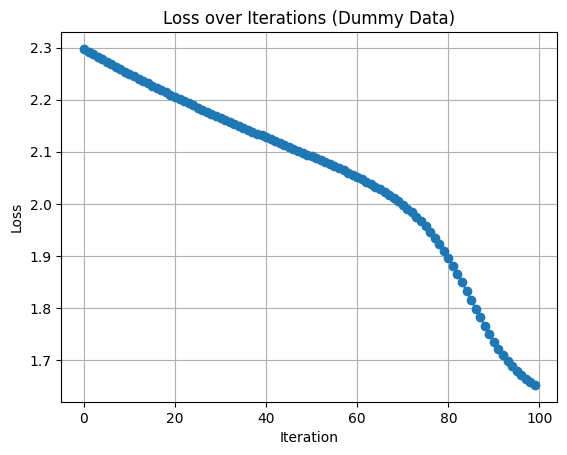

In [17]:
# Number of iterations (pseudo-epochs for tiny dummy dataset)
num_iterations = 100
learning_rate = 0.01

# Store loss values for plotting
loss_history = []

for i in range(num_iterations):
    # --- Forward Pass ---
    Z_hidden1 = dense_input_hidden.forward(X)
    A_hidden1 = relu_hidden1.forward(Z_hidden1)

    Z_hidden2 = dense_hidden_hidden.forward(A_hidden1)
    A_hidden2 = relu_hidden2.forward(Z_hidden2)

    Z_output = dense_hidden_output.forward(A_hidden2)
    y_pred = softmax(Z_output)

    # --- Compute Loss ---
    loss = cross_entropy_loss(y_pred, y_onehot)
    loss_history.append(loss)

    # --- Backward Pass ---
    dZ_output = y_pred - y_onehot
    dA_hidden2 = dense_hidden_output.backward(dZ_output, learning_rate)
    dZ_hidden2 = relu_hidden2.backward(dA_hidden2)

    dA_hidden1 = dense_hidden_hidden.backward(dZ_hidden2, learning_rate)
    dZ_hidden1 = relu_hidden1.backward(dA_hidden1)
    _ = dense_input_hidden.backward(dZ_hidden1, learning_rate)

    # --- Print progress every 10 iterations ---
    if (i+1) % 10 == 0:
        print(f"Iteration {i+1}/{num_iterations}, Loss: {loss:.4f}")

# --- Plot Loss Curve ---
import matplotlib.pyplot as plt

plt.plot(loss_history, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss over Iterations (Dummy Data)")
plt.grid(True)
plt.show()


#Minimal Evaluation

##Accuracy Function

In [18]:
def compute_accuracy(y_pred_probs, y_true_labels):
    """
    Computes accuracy
    y_pred_probs: predicted probabilities (batch_size, num_classes)
    y_true_labels: true integer labels (batch_size,)
    """
    y_pred_labels = np.argmax(y_pred_probs, axis=1)  # choose class with highest probability
    accuracy = np.mean(y_pred_labels == y_true_labels)
    return accuracy


##Evaluate on Current Data

In [19]:
# Forward pass for evaluation
Z_hidden1 = dense_input_hidden.forward(X)
A_hidden1 = relu_hidden1.forward(Z_hidden1)
Z_hidden2 = dense_hidden_hidden.forward(A_hidden1)
A_hidden2 = relu_hidden2.forward(Z_hidden2)
Z_output = dense_hidden_output.forward(A_hidden2)
y_pred = softmax(Z_output)

# Compute accuracy
accuracy = compute_accuracy(y_pred, y_true)
print(f"Accuracy on current data: {accuracy*100:.2f}%")


Accuracy on current data: 40.00%


##Visualize Some Predictions

In [20]:
print("Sample predictions (Predicted vs True):")
for i in range(min(10, X.shape[0])):  # first 10 samples (or less if X has <10)
    pred_label = np.argmax(y_pred[i])
    true_label = y_true[i]
    correct = "✅" if pred_label == true_label else "❌"
    print(f"Sample {i+1}: Predicted: {pred_label}, True: {true_label} {correct}")


Sample predictions (Predicted vs True):
Sample 1: Predicted: 1, True: 1 ✅
Sample 2: Predicted: 1, True: 3 ❌
Sample 3: Predicted: 0, True: 0 ✅
Sample 4: Predicted: 1, True: 9 ❌
Sample 5: Predicted: 1, True: 4 ❌
